NAMA : CINDY SETYOWATI
NIM : 312210693
KELAS : TI.22.C3
MATA KULIAH: DATA MINING

PENERAPAN GRIDSEARCH CV DAN PIPELINE PADA DATASET TITANIC

1. Apa yang dimaksud dengan Pipeline dalam konteks machine learning?
Pipeline adalah sebuah rangkaian proses yang menggabungkan tahap preprocessing dan training model ke dalam satu kesatuan workflow. Dengan pipeline, semua tahapan dilakukan secara sistematis dan otomatis saat training dan prediksi.

2. Mengapa penggunaan Pipeline penting dalam proses pembangunan model machine learning?
Karena:
*   Menghindari data leakage
*  Memastikan konsistensi preprocessing pada training dan testing
*   Mempermudah eksperimen dengan model
*   Terintegrasi dengan GridSearchCV

3. Jelaskan apa itu GridSearchCV dan bagaimana cara kerjanya?
GridSearchCV adalah teknik otomatis untuk mencari kombinasi hyperparameter terbaik. Ia melakukan evaluasi terhadap setiap kombinasi parameter dengan teknik cross-validation dan memilih kombinasi dengan performa terbaik.

4. Apa keuntungan menggunakan GridSearchCV dibandingkan melakukan tuning hyperparameter secara manual?

*   Lebih objektif karena menggunakan cross-validation
*   Menghindari bias manusia




PENERAPAN GRIDSEARCHCV DAN PIPELINE

In [ ]:
# 1. Import semua library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# 2. Load dan tampilkan data Titanic
url = "https://raw.githubusercontent.com/asepmuhidin/MK-Data-Mining-UPB/refs/heads/main/dataset/titanic.csv"
df = pd.read_csv(url)

print("5 Baris Pertama:")
display(df.head())

print("\nInfo Dataset:")
print(df.info())


5 Baris Pertama:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
# 3. Pisahkan fitur dan target
X = df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])
y = df['Survived']


In [ ]:
# 4. Definisikan kolom numerik dan kategorikal
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Sex', 'Embarked', 'Pclass']


In [ ]:
# 5. Pipeline preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


In [ ]:
# 6. Buat pipeline dengan classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [ ]:
# 7. Hyperparameter Grid
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5]
}


In [ ]:
# 8. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 9. GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:")
print(grid_search.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters:
{'classifier__max_depth': 5, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}



Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



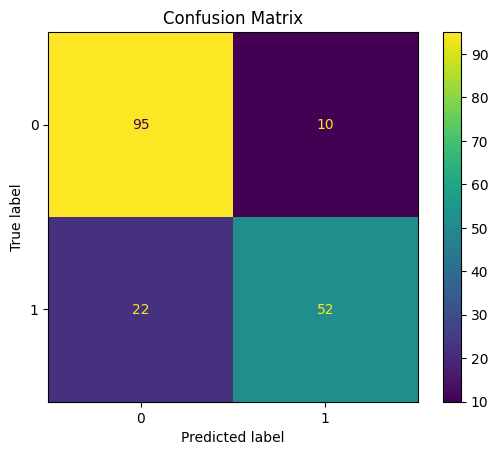

In [ ]:
# 10. Evaluasi hasil
y_pred = grid_search.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# 11. Akurasi model
print("Best CV Score:", grid_search.best_score_)
print("Test Accuracy:", grid_search.score(X_test, y_test))


Best CV Score: 0.8173643258150302
Test Accuracy: 0.8212290502793296
